### Importing packages

In [233]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [234]:
df = read_csv(r'C:/Users/aanal/Documents/cbd/ndtv_data_final.csv')

In [235]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [236]:
df.shape

(1359, 22)

In [237]:
df.drop(columns=['Unnamed: 0'], inplace=True) # Index column

In [238]:
df.shape

(1359, 21)

In [251]:
class EDABasic:
    def __init__(self, df, numcols, catcols):
        self.df = df
        self.numcols = numcols
        self.catcols = catcols
        self.basicEDA()
        
    def basicEDA(self):
        '''
            function: basicEDA -> This function is used for the basic EDA of data frame such as shape, statstic summary
            arg: None
            return: None
        '''
        # checking the shape of the data frame
        shape = self.df.shape
        print("SHAPE OF DATAFRAME:")
        print('Columns = {}'.format(shape[0]))
        print('Rows = {}\n\n'.format(shape[1]))
        
        # cheking the missing values
        nullValues = self.df.isna().sum()
        noNull = 'No Null values' if nullValues.sum == 0 else nullValues
        print('Checking the missing values:\n')
        print('Missing values:\n{}\n\n'.format(noNull))
        
        # checking the duplicates
        duplicates = self.df.duplicated().sum()
        noduplicates = 'No Duplicat values' if duplicates == 0 else duplicates
        print('Checking the Duplicate values:')
        print('Duplicate values = {}\n\n'.format(noduplicates))
        
        # statstic summary of data frame
        print('The static summary: ')
        des = self.df.describe().T.reset_index()
        des.rename({'Index': 'Stats'}, inplace=True)
        dasData = des.to_dict(orient='list')
        table = tabulate(dasData, headers='keys', tablefmt='github', numalign='right') # tabulate converts data into table format
        print(table, '\n\n')
        
        # information of the data set
        print('The information: ')
        print(self.df.info(),'\n\n')
        
    def colPrice(self):
        '''
            function: colPrice -> shows the distribution of price in against other numaric columns in data frame using line graph
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        plt.figure(figsize=(5, 5))
        
        for column in range(0, len(numlist)-1, 2):
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            sns.lineplot(x=self.numcols[numlist[column]], y=self.df['Price'], data=self.numcols, ax=axes[0])
            axes[0].set_title(numlist[column])

            sns.lineplot(x=self.numcols[numlist[column + 1]], y=self.df['Price'], data=self.numcols, ax=axes[1])
            axes[1].set_title(numlist[column + 1])

            plt.show()
        
    def calculateOutlires(self):
        '''
            function: calculateOutlires -> calculates the outlires in each numarical columns using IQR method
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        dataList = [['Name', 'q1', 'q3', 'IQR', 'Count']]
        for column in range(len(numlist)-1):
            q1 = self.numcols[numlist[column]].quantile(0.25)
            q3 = self.numcols[numlist[column]].quantile(0.75)

            IQR = q3 - q1

            lB = q1 - 1.5 * IQR
            uB = q3 + 1.5 * IQR
            dataList.append([numlist[column],q1,q3,IQR,((self.numcols[numlist[column]] < lB) | (self.numcols[numlist[column]] > uB)).sum()])
        table = tabulate(dataList, tablefmt='pretty') # tabulate converts data into table format
        print(table)
    
    def outliresBox(self):
        '''
            function: outliresBox -> shows the distribution of outlires using box plots
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        for column in range(0, len(numlist)-1, 2):
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            
            sns.boxplot(self.numcols[numlist[column]], ax=axes[0])
            axes[0].set_title(numlist[column])
            
            sns.boxplot(self.numcols[numlist[column + 1]], ax=axes[1])
            axes[1].set_title(numlist[column + 1])
    
    def bollValuePlot(self, df):
        '''
            function: bollValuePlot -> shows the distribution of boolean features from the data set using pie charts
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        fig, axes = plt.subplots(2, 3, figsize=(10,7))
        axes = axes.flatten()
        palettes = ['pastel', 'deep', 'bright', 'muted', 'colorblind', 'viridis']
        font_size = 15
        title_font = 20
        
        for i, (columnNmae, ax) in enumerate(zip(df.columns, axes)):
            size = df[columnNmae].value_counts()
            palette = sns.color_palette(palettes[i])
            ax.pie(size, labels=size.index, colors=palette, autopct='%1.1f%%', startangle=140, textprops={'fontsize': font_size})
            ax.set_title(columnNmae, fontsize=title_font)
            
        plt.tight_layout()
        plt.show()
        
    def FreCount(self, col, figsize_, dispercent):
        '''
            function: FreCount -> counts the percentage of catagorical columns and show the distribution using bar plots
            arg: col (pandas.core.series.Series) -> column of the data set
                 figsize_ (tuple) -> size of the graph
                 dispercent (boolean) -> 1: display the percentage of the distribution
                                         0: does not display the percentage of the distribution
            return: None
        '''
        df_brand = col.value_counts() 
        percent = round((df_brand * 100) / self.df.shape[0], 2)
        
        plt.figure(figsize=figsize_)
        ax = sns.barplot(x=percent.index, y=percent.values, palette='dark')
        plt.xlabel(col.name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        if dispercent:
            for i, value in enumerate(percent):
                plt.text(i, value, str(value), ha='center', va='bottom')
        plt.show()
        
    def corr(self):
        '''
            function: corr -> Represent the correlation of each numaric column using heat map
            arg: None
            return: None
        '''
        coff = self.df.corr(method='pearson', numeric_only=True)
        plt.figure(figsize=(12,10))
        sns.heatmap(data=coff, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1, linecolor='black')
        plt.show()

In [252]:
numcols = df.select_dtypes(include='number') # numeric column data set
catCols = df.select_dtypes(exclude='number') # catagorical column data set
catCols.drop(columns=['Name'], inplace=True)

In [253]:
numcols.head()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
0,4085,6.67,1440,3120,8,12000,256.0,48.0,16.0,2,58998
1,4000,6.50,1080,2400,8,6000,64.0,64.0,16.0,2,27999
2,3969,6.50,1242,2688,6,4000,64.0,12.0,12.0,2,106900
3,3110,6.10,828,1792,6,4000,64.0,12.0,12.0,2,62900
4,4000,6.40,1080,2340,8,6000,128.0,12.0,32.0,1,49990


In [254]:
print('BASIC EDA\n')
eda = EDABasic(df, numcols, catCols) # creating a class instance

BASIC EDA

SHAPE OF DATAFRAME:
Columns = 1359
Rows = 21


Checking the missing values:

Missing values:
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64


Checking the Duplicate values:
Duplicate values = No Duplicat values


The static summary: 
| index                  |   count |    mean |      std |   min |    25% |   50% |   75% |    max |
|------------------------|---------|---------|----------|-------|--------|-------|-------|--------|
|

<Figure size 500x500 with 0 Axes>

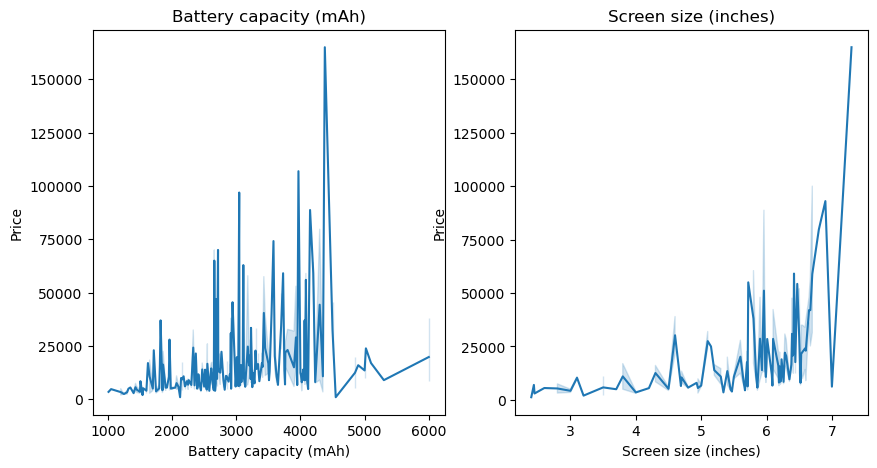

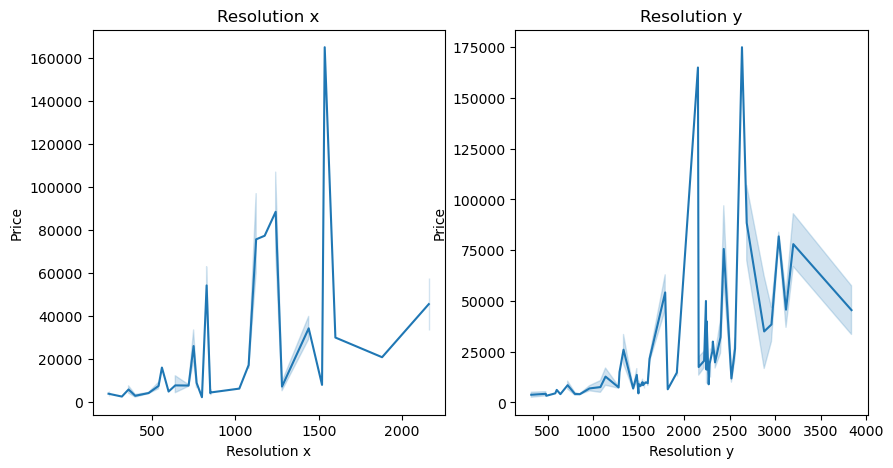

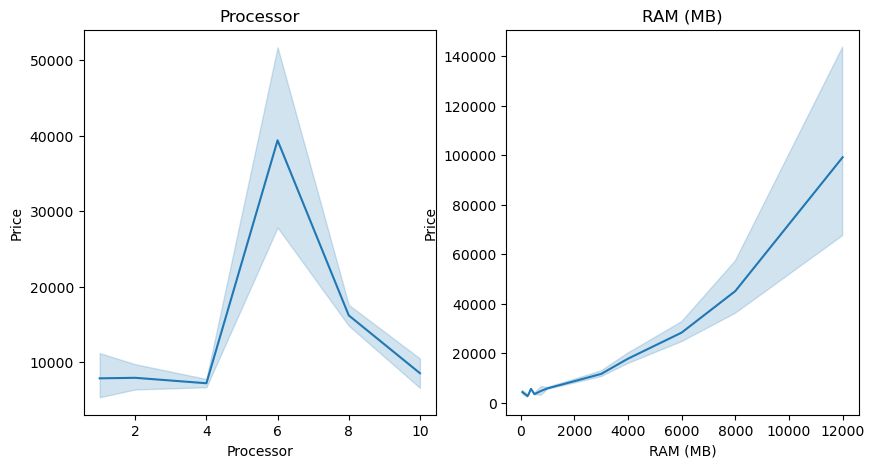

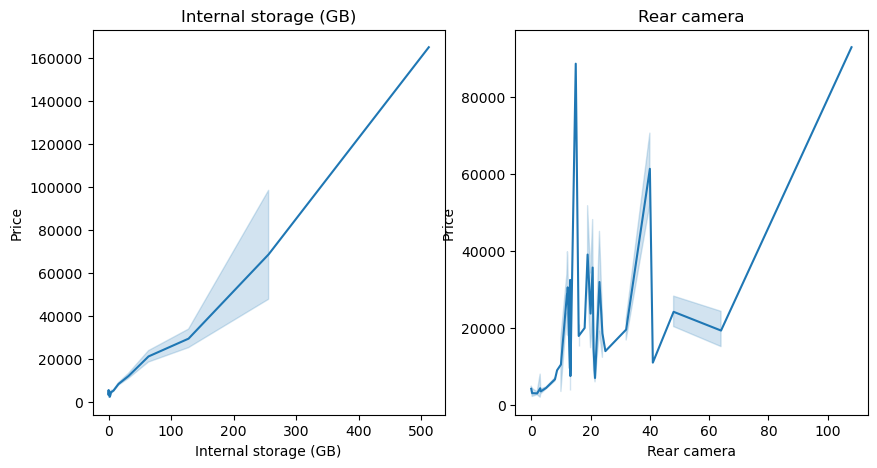

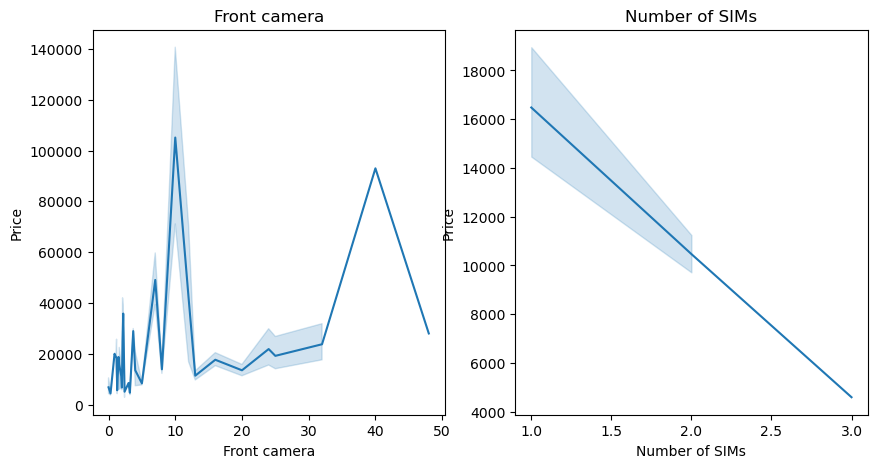

In [255]:
eda.colPrice() 

+------------------------+--------+--------+--------------------+-------+
|          Name          |   q1   |   q3   |        IQR         | Count |
| Battery capacity (mAh) | 2300.0 | 3500.0 |       1200.0       |   3   |
|  Screen size (inches)  |  5.0   |  5.7   | 0.7000000000000002 |  22   |
|      Resolution x      | 720.0  | 1080.0 |       360.0        |   3   |
|      Resolution y      | 1280.0 | 1920.0 |       640.0        |  21   |
|       Processor        |  4.0   |  8.0   |        4.0         |   0   |
|        RAM (MB)        | 1000.0 | 3000.0 |       2000.0       |  33   |
| Internal storage (GB)  |  8.0   |  32.0  |        24.0        |  79   |
|      Rear camera       |  8.0   |  13.0  |        5.0         |  91   |
|      Front camera      |  2.0   |  8.0   |        6.0         |  79   |
|     Number of SIMs     |  2.0   |  2.0   |        0.0         |  228  |
+------------------------+--------+--------+--------------------+-------+


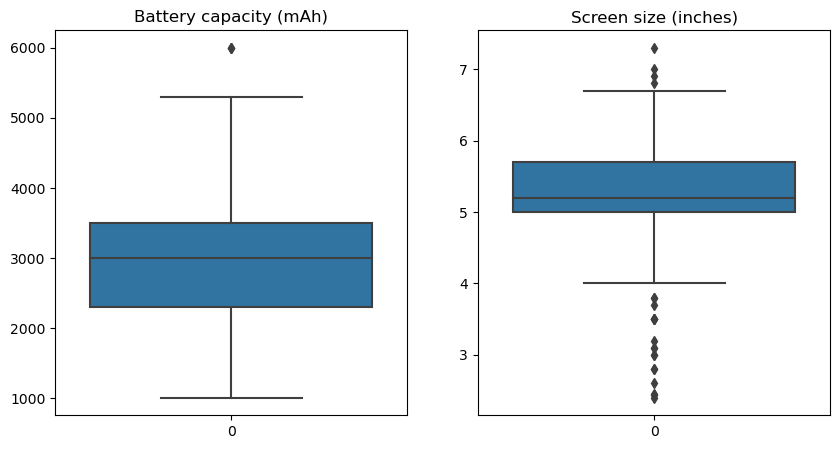

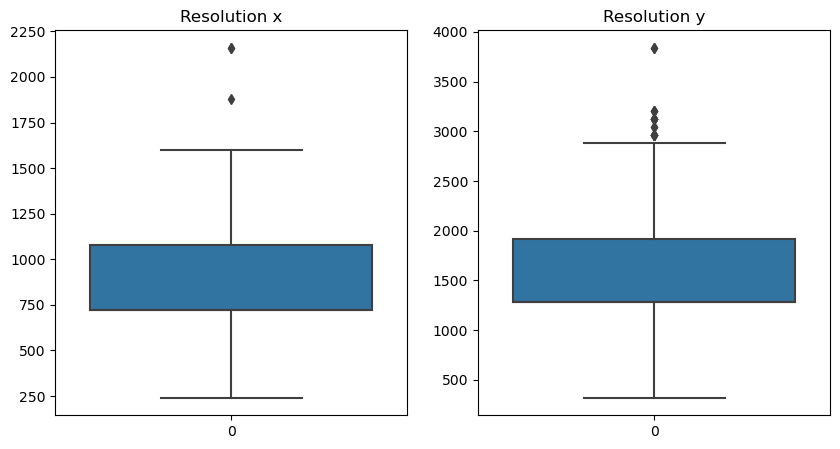

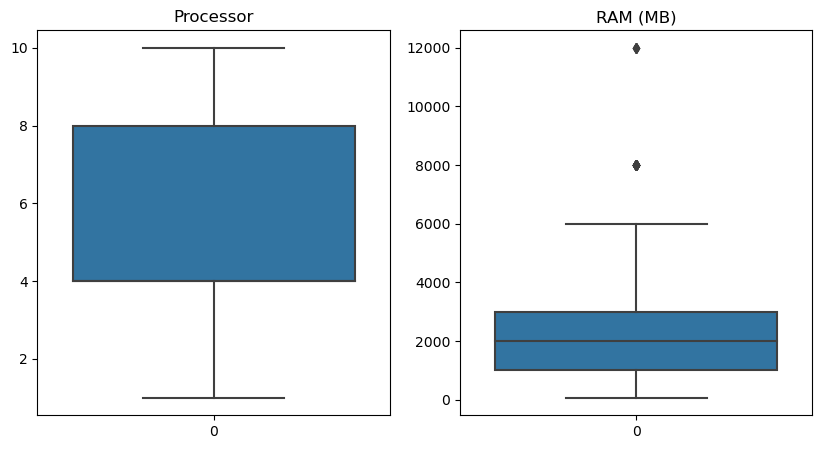

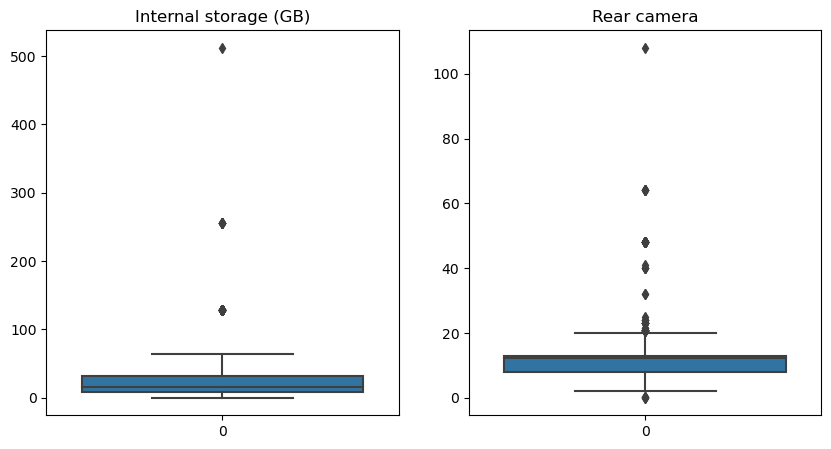

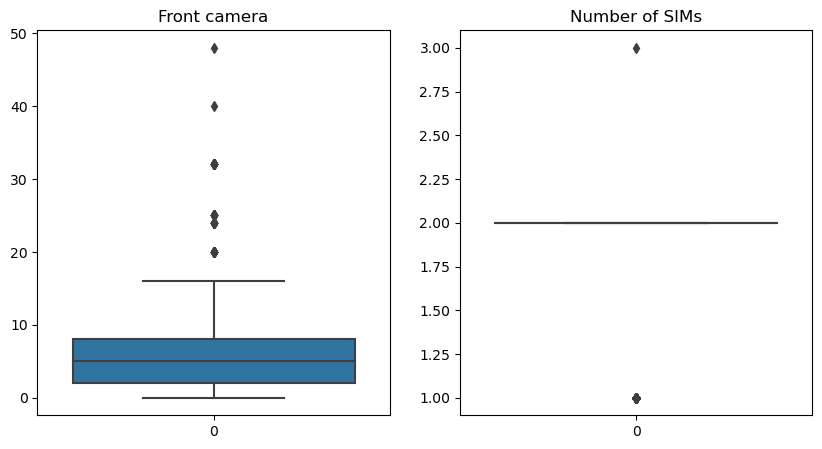

In [257]:
eda.calculateOutlires()
eda.outliresBox()

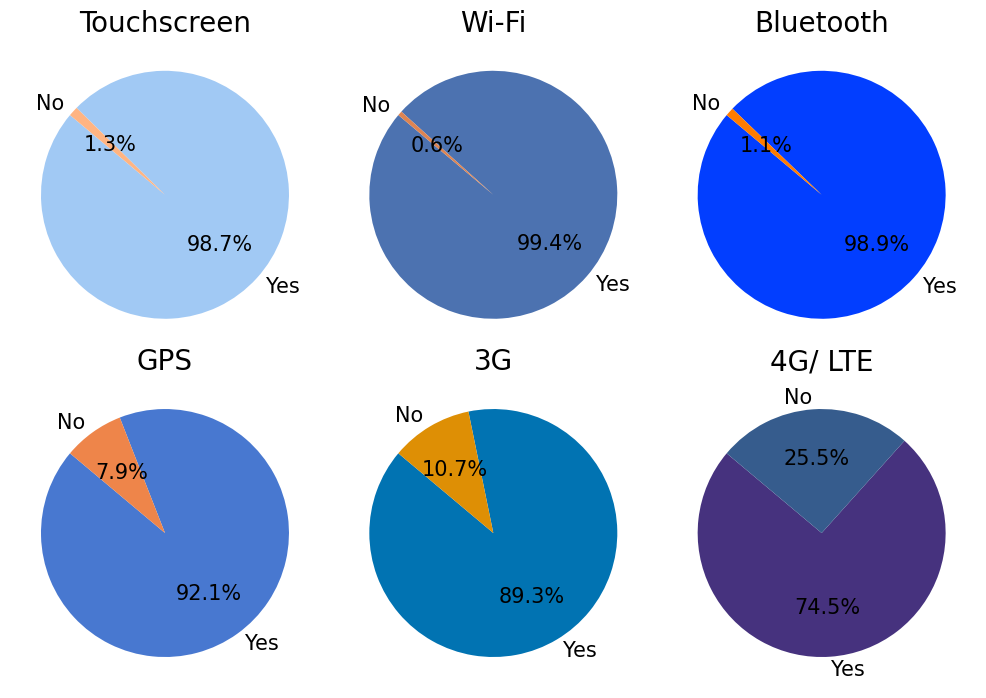

In [179]:
eda.bollValuePlot(catCols.drop(columns=['Brand', 'Model', 'Operating system']))

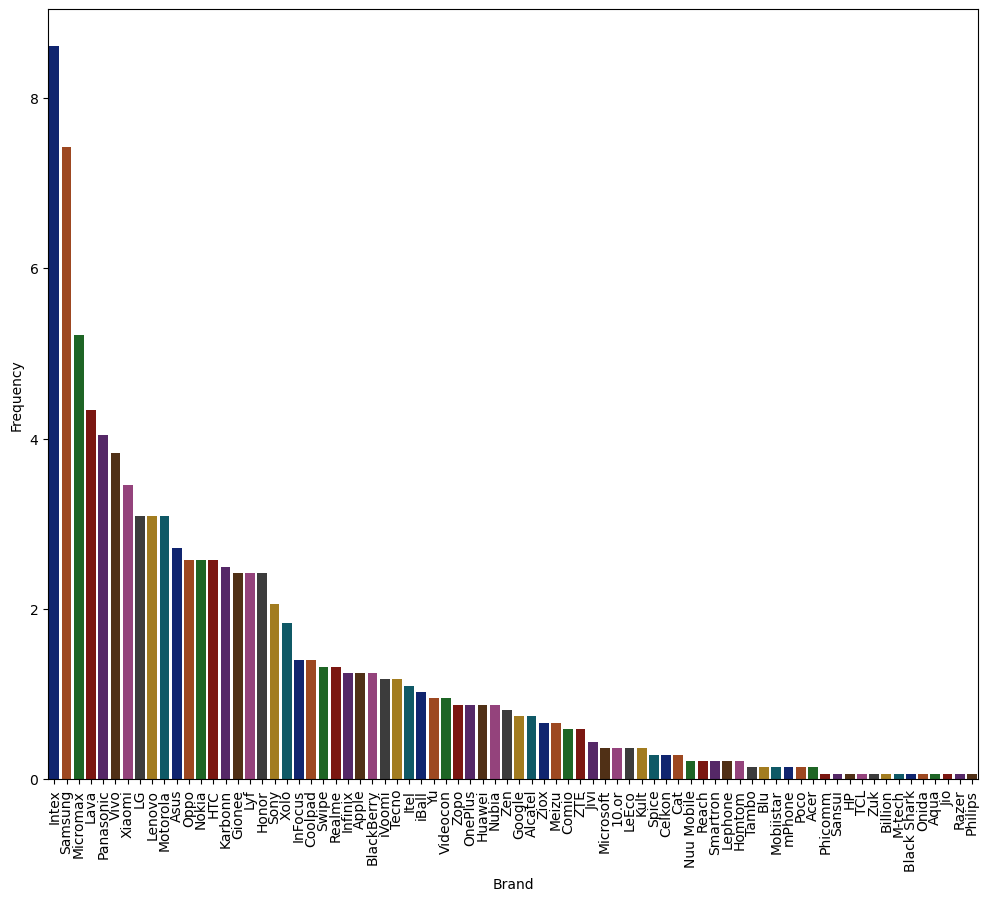

In [259]:
eda.FreCount(df['Brand'], (12, 10), 0)

In [182]:
df.head(2)

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999


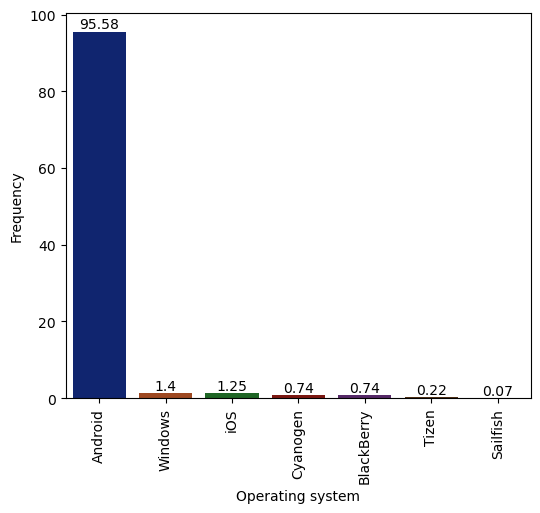

In [183]:
eda.FreCount(df['Operating system'], (6,5), 1)

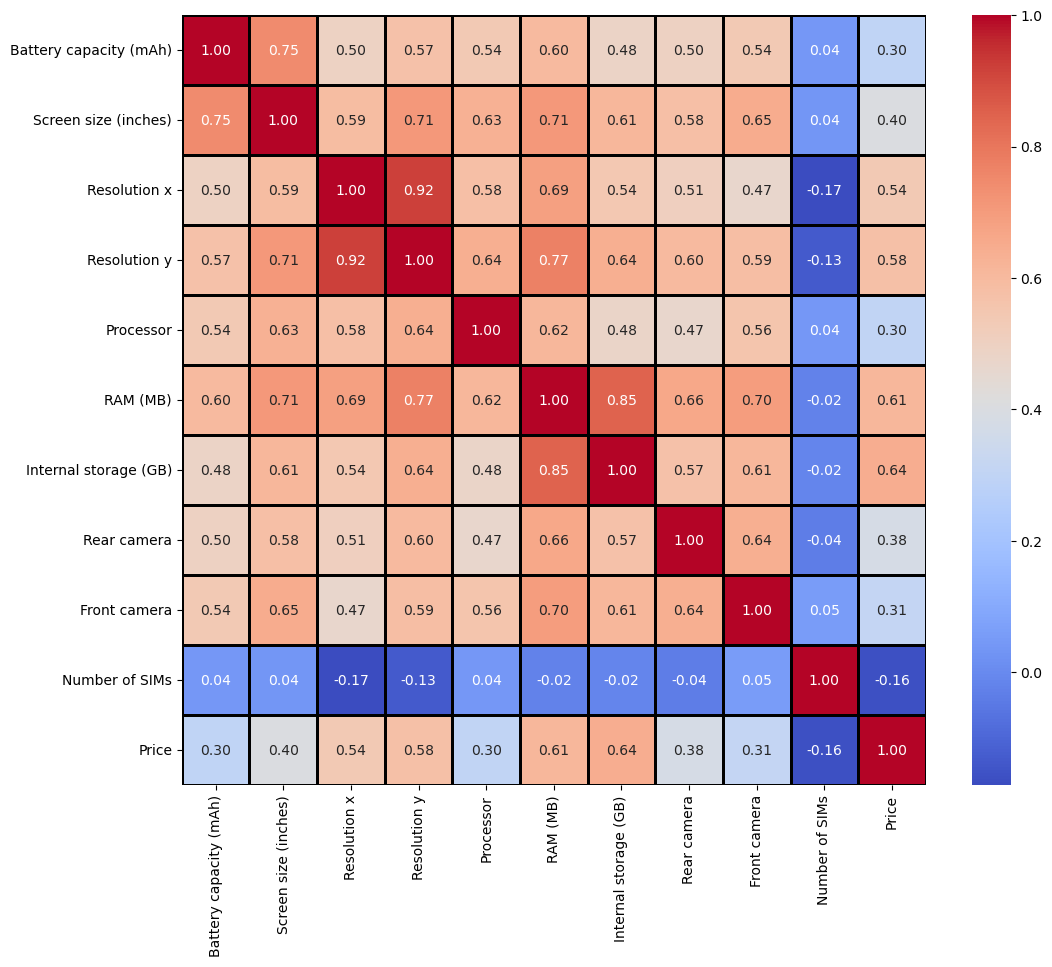

In [184]:
eda.corr()

In [185]:
class preProcessing:
    def __init__(self, df):
        self.df = df
        
    def outlireHandeling(self, col):
        '''
            function: outlireHandeling -> Performs the log transformation on the columnn
            arg: col (pandas.core.series.Series) -> column of the data set
            return: 'This column does not exsist in data set' (str) -> if the column does not exsist
        '''
        if col not in self.df.columns.tolist():
            return 'This column does not exsist in data set'
        self.df['logTranforedPrice'] = round(np.log10(df[col] + 1),2)
        
    def comparisionofResults(self, col1, col2):
        '''
            function: comparisionofResults -> shows the visual comaparision of two columns in two bar graph
            arg: col1 (pandas.core.series.Series) -> column of the data set
                 col2 (pandas.core.series.Series) -> column of the data set
            return: None
        '''
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        plt.suptitle('Comparision of original price v/s log transformation', fontsize=20)
        sns.histplot(ax=axes[0], x=self.df['Price'], bins=70, kde=True, color=(0.95, 0.1, 0.85))
        axes[0].set_xlabel('Price', fontsize=15)
        axes[0].set_ylabel('Frequency', fontsize=15)
        sns.histplot(ax=axes[1], x=self.df['logTranforedPrice'], bins=50, kde=True, color=(0.2, 0.85, 0.95))
        axes[1].set_xlabel('Log Transformed Price', fontsize=15)
        axes[1].set_ylabel('Frequency', fontsize=15)
        plt.show()
        
    def labelEncoding(self, column):
        '''
            function: labelEncoding -> performs label encoding on the catagorical columns
            arg: column (pandas.core.indexes.base.Index) -> index of the columns 
            return: None
        '''
        labelEncoder = LabelEncoder()
        for col in column:
            self.df[col] = labelEncoder.fit_transform(self.df[col])

In [186]:
preprocess = preProcessing(df)

In [187]:
preprocess.outlireHandeling('Price')

In [188]:
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,logTranforedPrice
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998,4.77
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999,4.45
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900,5.03
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900,4.80
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,32.0,Android,Yes,Yes,Yes,1,No,No,49990,4.70


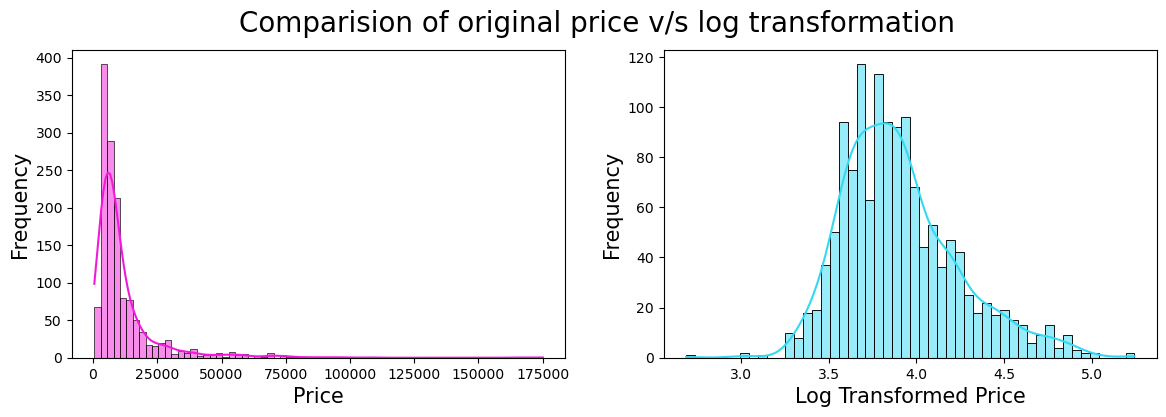

In [189]:
preprocess.comparisionofResults('Price', 'logTranforedPrice')

In [190]:
preprocess.labelEncoding(catCols.drop(columns=['Brand']).columns)

In [191]:
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,logTranforedPrice
0,OnePlus 7T Pro McLaren Edition,OnePlus,49,4085,6.67,1,1440,3120,8,12000,...,16.0,0,1,1,1,2,1,1,58998,4.77
1,Realme X2 Pro,Realme,1142,4000,6.50,1,1080,2400,8,6000,...,16.0,0,1,1,1,2,1,1,27999,4.45
2,iPhone 11 Pro Max,Apple,1288,3969,6.50,1,1242,2688,6,4000,...,12.0,6,1,1,1,2,1,1,106900,5.03
3,iPhone 11,Apple,1286,3110,6.10,1,828,1792,6,4000,...,12.0,6,1,1,1,2,1,1,62900,4.80
4,LG G8X ThinQ,LG,522,4000,6.40,1,1080,2340,8,6000,...,32.0,0,1,1,1,1,0,0,49990,4.70
